In [ ]:
!pip install --upgrade pip
!pip install -U tensorflow
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.3 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Unin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import json

# Sentence Transformer


The Next Line Loads Sentence Transformer which is a model that takes in a sentence and returns a vector. Mathematically its just a function that looks like this:

\begin{align}
f: \mathbb{V}^\mathbb{N} \rightarrow \mathbb{R}^N
\end{align}

Where $\mathbb{V}$ is the english vocabulary (the set of all words) , $\mathbb{N}$ is he natral numbers, $\mathbb{R}^D$ is the set of vectors of dimension $N$ (for example if $N=2$ then the vector ${1 \choose 0} \in \mathbb{R}^2$). Finally $\mathbb{V}^\mathbb{N}$ represents the set all possible sentences that can be made with the vocbulary b.

As a trivial example imagine the following scenario:

\begin{align}
\mathbb{V} = \{\mathrm{Hi}, \mathrm{Bye}\}
\end{align}

Then

\begin{align}
\mathbb{V}^\mathbb{N} = \left\{"\mathrm{Hi}", "\mathrm{Bye}", "\mathrm{Hi} \mathrm{Bye}", "\mathrm{Bye}", "\mathrm{Hi}\mathrm{Hi}", "\mathrm{Hi}\mathrm{Hi}\mathrm{Hi}", ...., "\mathrm{Bye}... \mathrm{Bye})", ... \right\}
\end{align}

Clearly the set of all sentences is infinite even for a small vocabulary of 2 words. Now again imagine $N=2$ then applying $f$ to our fake sentences could look like this for example:

\begin{align}
f("\mathrm{Bye}") = {1 \choose 0.2}, \; \; f("\mathrm{Bye}\mathrm{Hi}") = {0.013\choose -1.12}
\end{align}

We are going to use this to begin with as the recipie to image github repo has all its links broken

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Now here is an example of this sentence embedder in action, look how it transform this sentence into a list of numbers (a vector in $\mathbb{R}^{384}$)

In [ ]:
sentence = ['This framework generates embeddings for each input sentence']

#Sentences are encoded by calling model.encode()
embedding = model.encode(sentence)
print(embedding.shape)

(1, 384)


Here is another example where we take 3 sentences and obtain a vector for each

In [ ]:
sentences = ["Hi I am john", "The end of the world is near its all over", "I like pizza"]
embeddings = model.encode(sentences)
print(embeddings.shape) # This is a matrix where row one corresponds to "Hi I am John", Row 2 corresponds to "The end of the ..." and row 3 to "I like pizza ..."

(3, 384)


I mounted my google drive where I can accesss the recipie file that I uploaded. 

In [ ]:
recipie_file = "/content/drive/MyDrive/ArturoRecipieFiles/recipes_with_nutritional_info.json"

In [ ]:
import json
recipies = json.load(open(recipie_file, "rb"))

In [ ]:
recipies[0]

{'fsa_lights_per100g': {'fat': 'green',
  'salt': 'green',
  'saturates': 'green',
  'sugars': 'orange'},
 'id': '000095fc1d',
 'ingredients': [{'text': 'yogurt, greek, plain, nonfat'},
  {'text': 'strawberries, raw'},
  {'text': 'cereals ready-to-eat, granola, homemade'}],
 'instructions': [{'text': 'Layer all ingredients in a serving dish.'}],
 'nutr_per_ingredient': [{'fat': 0.8845044000000001,
   'nrg': 133.80964,
   'pro': 23.110512399999998,
   'sat': 0.26535132,
   'sod': 81.64656,
   'sug': 7.348190400000001},
  {'fat': 0.46,
   'nrg': 49.0,
   'pro': 1.02,
   'sat': 0.023,
   'sod': 2.0,
   'sug': 7.43},
  {'fat': 7.415,
   'nrg': 149.25,
   'pro': 4.17,
   'sat': 1.207,
   'sod': 8.0,
   'sug': 6.04}],
 'nutr_values_per100g': {'energy': 81.12946131894766,
  'fat': 2.140139263515891,
  'protein': 6.914436593565536,
  'salt': 0.05597816738985967,
  'saturates': 0.36534716195613937,
  'sugars': 5.08634103436144},
 'partition': 'train',
 'quantity': [{'text': '8'}, {'text': '1'},

In [ ]:
# lets find out what the keys are
partition_keys = []
for x in recipies:
  partition_keys += [x['partition']]

print(set(partition_keys))

{'val', 'test', 'train'}


In [ ]:
partition_keys = ['train', 'val', 'test']

Ok so Now we want to take any useful ingredient data and put it into a string and predict the energy (which is calories) so I am going to write  a little script that transforms the data into (sentence, energy) pairs so we can train a model or do retrieval (up to you).  

In [ ]:
def parse_ingredients(ingredients):
  """
  Takes an input of the form:
    [{'text': 'yogurt, greek, plain, nonfat'},
     {'text': 'strawberries, raw'},
     {'text': 'cereals ready-to-eat, granola, homemade'}]

  And returns a concatenated string sentence.

  "yogurt-greek-plain-nonfat strawberries-raw, cereals-ready-to-eat, granola-homemade"

  You can brain storm better sentence representations, read papers etc.

  Args:
    :ingredients: lst as specified in the the description
  
  Returns:
    sentence in strong form
  """
  lst = []
  for ing in ingredients:
    lst += [ing["text"].replace(", ", "-")]
  
  return ", ".join(lst)


def parse_instructions(instructions):
  """
  Takes an input of the form:
    [{'text': 'Layer all ingredients in a serving dish.'}]

  And returns a concatenated string sentence.

  "Layer all ingredients in a serving dish."

  You can brain storm better sentence representations, read papers etc.

  Args:
    :instructions: lst as specified in the the description
  
  Returns:
    sentence in strong form
  """
  lst = []
  for ing in instructions:
    lst += [ing["text"]]
  
  return ", ".join(lst)

def make_data(lst, partition="train"):
  """
  This function takes the data and produces a dataset ready for regression.

  Args:
    :lst[List]: parsed Recipie 1M json
    :partition[String]: can be either "train", "test", "val"
  """
  dataset_X = []
  dataset_y = []
  for x in lst:
    if x["partition"] == partition:
      ingredients = parse_ingredients(x["ingredients"])
      instructions = parse_instructions(x["instructions"])
      calories = x["nutr_values_per100g"]["energy"]
      sentence = ingredients + ". " + instructions

      dataset_X += [sentence]
      dataset_y += [calories]
  return dataset_X, dataset_y
  


In [ ]:
X_train, y_train  = make_data(recipies, "train")
X_test, y_test  = make_data(recipies, "test")

In [ ]:
X_train[1]

'chicken-broilers or fryers-wing-meat and skin-raw, salt-table, spices-pepper-black, oil-olive-salad or cooking, butter-without salt, sauce-hot chile-sriracha, honey, rice-white-long-grain-regular-unenriched-cooked without salt, soy sauce made from soy (tamari), sauce-hoisin-ready-to-serve, salt-table, spices-coriander seed. Preheat oven to 400 degrees F., In a large bowl, toss the wings with salt and pepper and oil., Line a sheet pan with nonstick foil or parchment paper, and spread the wings evenly on the pan., Bake for about 50 minutes, turning the wings halfway through., In the last couple of minutes, you can turn on the broiler to get them to really crisp up., Keep an eye on them, though!, When the wings are done, melt the butter in a skillet or wok and add the Sriracha, honey, rice wine, soy sauce, hoisin, and salt., Stir over low heat until bubbly., Transfer the wings from the baking sheet into the pan with the sauce., Toss until coated., Garnish with chopped cilantro and serve 

In [ ]:
y_train, y_test = np.array(y_train).reshape(-1,1), np.array(y_test).reshape(-1,1)

In [ ]:
len(X_train), len(X_test)

(35867, 7681)

Now get ready for the grand finalle we will transform these into vectors !!! (Its very slow as its turning 40k+ things into vectors)

In [ ]:
smaller = -1

vec_X_train = model.encode(X_train[:smaller])
vec_X_test = model.encode(X_test[:smaller])

In [ ]:
vec_X_test.shape

(7680, 384)

In [ ]:
vec_X_train.shape, vec_X_test.shape

((35866, 384), (7680, 384))

Now that we have a vector dataset we can just train a regression model.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# This trains the model
retrieval = True
if not retrieval:
  regr = MLPRegressor(hidden_layer_sizes=[600, 300, 150], random_state=1, max_iter=5000).fit(vec_X_train, y_train[:smaller].flatten())
else:
  regr = KNeighborsRegressor(n_neighbors=4, metric="cosine", weights="distance").fit(vec_X_train, y_train[:smaller].flatten())

In [ ]:
import matplotlib.pyplot as plt

if not retrieval:
  plt.plot(regr.loss_curve_);
  plt.xlabel("Training Itertion")
  plt.ylabel("Training Error")
  min(regr.loss_curve_)

Based on the above plot the model does seem converged / to have converged quite quckly.

To test we will look at the root mean squared error in calories to begin with. If you look at the median absolute error it does suggest theres some outliers in the test result, its worth seeing what the recipie for the worst performances is and to try and diagnose why this is not working 

In [ ]:
delta_test= regr.predict(vec_X_test) - y_test[:smaller].flatten()
print(delta_test.shape)
rmse_test = np.sqrt(np.mean((delta_test) ** 2))
rmae_test = np.median(np.abs(delta_test))

rmse_test, rmae_test

(7680,)


(139.97435749080142, 70.90573587189542)

In [ ]:
delta_train = regr.predict(vec_X_train) - y_train[:smaller].flatten()
print(delta_train.shape)
rmse_train = np.sqrt(np.mean((delta_train) ** 2))
rmae_train = np.median(np.abs(delta_train) )
rmse_train, rmae_train

(35866,)


(5.4364487404179025, 0.0)

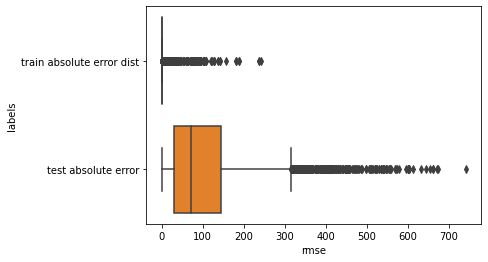

In [ ]:
import seaborn as sns
import pandas as pd


labels = ["train absolute error dist"] * len(delta_train) + ["test absolute error"] * len(delta_test) 
rmse_train_all = list(np.abs(delta_train)) + list(np.abs(delta_test))

df = pd.DataFrame({
    "rmse": rmse_train_all,
    "labels": labels
})

sns.boxplot(data=df, x="rmse", y="labels")

This is the error in kCal per 100g , pretty easy quantity to interpret.

We can see that the test error is at 145 kcals per 100g whilst the train error is 20kcal per 100g thus this model does not generalise well (it overfits). Maybe we need: 

* Better recipie specific embeddings
* Maybe using image data is better
* The way we encoded recipies into sentences might have not been the smartest
* We could try training the model for longer.

# How do we use this for a new recipeie

For a new recipie we  need to first write a function that transforms it into a similar-ish sentence format to what we have used in training then we pass it through the transformer sentence embedder and the pass it through the trained model it for example:

In [ ]:
ingredients_sentence = ["greasy-pizza, fish, fried-potatoes"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

array([199.54845])

In [ ]:
ingredients_sentence = ["broccoli, lettuce, water"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

array([126.06083824])

In [ ]:
ingredients_sentence = ["onion, tomato, squash"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

array([205.47451669])

In [ ]:
ingredients_sentence = ["tomato, spinach, ginger"]
vector = model.encode(ingredients_sentence)
prediction = regr.predict(vector)
prediction

array([101.2665324])



Think about the above results, they are not quite right and some are quite wrong/unintuitve thus it seems this model hasnt learned anything good unfortunately. 

Maybe:

* I processed the data wrong ?
* We need more data ?
* We need to train for longer

